# Complete the steps given below:

## 1. Perform necessary EDA on the data
## 2. Use machine learning to create clusters of similar projects.
## 3. Create a regression model to predict the budget
## 4. Create a classification model to predict the value of the Type column.

In [1]:
import pandas as pd
  
df = pd.read_csv('Freelance_Platform_Projects[1].csv') # reading csv file
df.head() # display first five rows

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer


In [2]:
df.tail() # display last five rows

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
12217,Published Travel Writer required for content c...,Writing & Translation,Entry ($),Content Writing,GBP,50.0,remote,ALL,fixed_price,2023-01-18 19:23:01,I am looking for a published travel writer to ...,NaN,2011-06-06,Amsterdam,Netherlands,GBP,Wordpress Expert
12218,Shopify - Filtering Work (Product Selection/No...,Design,Intermediate ($$),Web Design,GBP,65.0,remote_country,GB,fixed_price,2023-01-18 19:18:48,On our website www.juicebitz.co.uk we have add...,1 day or less,2022-03-23,Filey,United Kingdom,GBP,Director
12219,Simple SQL Query,Technology & Programming,Entry ($),Data Science & Analysis,GBP,50.0,remote,ALL,fixed_price,2023-01-18 19:18:48,I need someone to write a quick SQL query on a...,NaN,2022-03-14,London,United Kingdom,GBP,NaN
12220,"Create a Carbon, Water, Waste Calculating plat...",Design,Expert ($$$),Web Design,USD,39.0,remote,ALL,hourly,2023-01-18 19:18:47,I am seeking a full stack web developer who sp...,NaN,2013-07-21,Noida,India,USD,"Google Adwords, Pay Per Click, Google Shopping..."
12221,COMPANY REGISTERS,Business,Expert ($$$),Administration Assistance,GBP,75.0,remote,ALL,fixed_price,2023-01-18 19:18:47,"Hi, the following administrative task would be...",NaN,2020-09-21,Grays,United Kingdom,GBP,NaN


In [3]:
df.size # no of total elements

207774

In [4]:
df.shape # no of rows = 12222 , no of column = 17

(12222, 17)

In [5]:
df.info() # detailed info of your data

# Number of rows = 12222
# Number of columns = 17
# For every column
# => Name of column
# => Number of not null values
# => Number of null value = Total rows - Not null values
# => Data type
# Number of columns for each data type
# Memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      12222 non-null  object 
 1   Category Name              12222 non-null  object 
 2   Experience                 12222 non-null  object 
 3   Sub Category Name          12222 non-null  object 
 4   Currency                   12222 non-null  object 
 5   Budget                     12222 non-null  float64
 6   Location                   12222 non-null  object 
 7   Freelancer Preferred From  12222 non-null  object 
 8   Type                       12222 non-null  object 
 9   Date Posted                12222 non-null  object 
 10  Description                12222 non-null  object 
 11  Duration                   1602 non-null   object 
 12  Client Registration Date   12222 non-null  object 
 13  Client City                12222 non-null  obj

In [6]:
df.drop(['Date Posted', 'Client Registration Date'], axis = 1, inplace = True) # droping unnecessary columns

# 1) EDA

Perform necessary EDA on the data

## Handling Missing Values

In [7]:
df.isnull().sum() # total no of missing values in each column

Title                            0
Category Name                    0
Experience                       0
Sub Category Name                0
Currency                         0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Description                      0
Duration                     10620
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

In [8]:
# display the rows in which the 'Duration' column has missing values. 

missing_rows = df.index[df['Duration'].isna()==True]
df.loc[missing_rows,'Duration']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
12216    NaN
12217    NaN
12219    NaN
12220    NaN
12221    NaN
Name: Duration, Length: 10620, dtype: object

In [9]:
# Imputation (Maximum values are missing so we can't delete it because after deletion we will have very less data)

df['Duration'].fillna("Not Available", inplace=True)
df.loc[missing_rows,:]

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Description,Duration,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,We are looking to improve the banner images on...,Not Available,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,Hello \n\nI need a quick designer to make 4 pi...,Not Available,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,Hi - I need a bookkeeper to assist with bookke...,Not Available,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,Hi - I need an accountant to assist me with un...,Not Available,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,"Hi, I am currently running a project where I w...",Not Available,Mumbai,India,USD,Guest posts buyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,Simple SQL Query,Technology & Programming,Entry ($),Databases,GBP,30.0,remote,ALL,fixed_price,I need someone to write a quick SQL query base...,Not Available,London,United Kingdom,GBP,NaN
12217,Published Travel Writer required for content c...,Writing & Translation,Entry ($),Content Writing,GBP,50.0,remote,ALL,fixed_price,I am looking for a published travel writer to ...,Not Available,Amsterdam,Netherlands,GBP,Wordpress Expert
12219,Simple SQL Query,Technology & Programming,Entry ($),Data Science & Analysis,GBP,50.0,remote,ALL,fixed_price,I need someone to write a quick SQL query on a...,Not Available,London,United Kingdom,GBP,NaN
12220,"Create a Carbon, Water, Waste Calculating plat...",Design,Expert ($$$),Web Design,USD,39.0,remote,ALL,hourly,I am seeking a full stack web developer who sp...,Not Available,Noida,India,USD,"Google Adwords, Pay Per Click, Google Shopping..."


In [10]:
# display the rows in which the 'Client Job Title' column has missing values. 

missing_rows = df.index[df['Client Job Title'].isna()==True]
df.loc[missing_rows,'Client Job Title']

6        NaN
8        NaN
9        NaN
11       NaN
15       NaN
        ... 
12213    NaN
12214    NaN
12216    NaN
12219    NaN
12221    NaN
Name: Client Job Title, Length: 7634, dtype: object

In [11]:
# Imputation 

df['Client Job Title'].fillna("Not Available", inplace=True)
df.loc[missing_rows,:]

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Description,Duration,Client City,Client Country,Client Currency,Client Job Title
6,Make web site for Tutoring company,Design,Entry ($),Web Design,USD,10.0,remote,ALL,fixed_price,I need to build web site for my tutoring compa...,1 - 2 weeks,London,United Kingdom,USD,Not Available
8,E-learning,Design,Intermediate ($$),Illustration & Drawing,GBP,0.0,remote,ALL,fixed_price,Looking for a quote for an introductory e-lear...,Not Available,Glasgow,United Kingdom,GBP,Not Available
9,19 sentences recording. native english speaker...,Music & Audio,Entry ($),Voice-Over,USD,10.0,remote,ALL,fixed_price,1. need native speaker from US or UK or CA\n2...,Not Available,Sydney,Australia,GBP,Not Available
11,Looking for someone to configure AWS server,Technology & Programming,Expert ($$$),Website Development,EUR,31.0,remote,ALL,hourly,Hi we are looking to deploy our domain from go...,Not Available,Budapest,Hungary,USD,Not Available
15,Logo colour change,Design,Entry ($),Logo Design,USD,10.0,remote,ALL,fixed_price,"Very easy job, I literally just need my logo c...",Not Available,Menai,Australia,USD,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12213,Need someone with Clickhouse Database expertise,Technology & Programming,Entry ($),Databases,USD,120.0,remote,ALL,fixed_price,I want to do a clickhouse database project whi...,Not Available,Fremont,United States,USD,Not Available
12214,modify existing flyer,Design,Entry ($),Graphic Design,USD,15.0,remote,ALL,fixed_price,i would like to modify a existing flyer which ...,Not Available,Dieburg,Germany,EUR,Not Available
12216,Simple SQL Query,Technology & Programming,Entry ($),Databases,GBP,30.0,remote,ALL,fixed_price,I need someone to write a quick SQL query base...,Not Available,London,United Kingdom,GBP,Not Available
12219,Simple SQL Query,Technology & Programming,Entry ($),Data Science & Analysis,GBP,50.0,remote,ALL,fixed_price,I need someone to write a quick SQL query on a...,Not Available,London,United Kingdom,GBP,Not Available


## Handling Outliers

<Axes: >

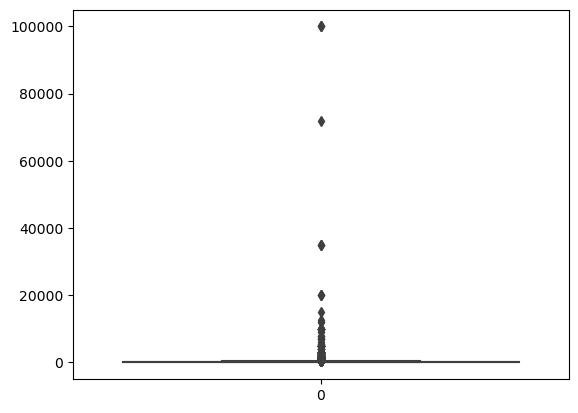

In [12]:
import seaborn as sns 

sns.boxplot(df['Budget']) # checking outliers(we are using 'Budget' column because it is only numeric column we have)

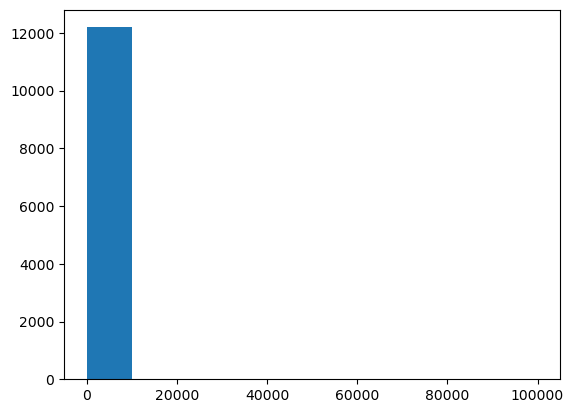

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['Budget']) # Create a histogram of the 'Budget' column in the DataFrame 'df'
plt.show()

In [14]:
# probably the reason of so many outliers is 'skewness'

df['Budget'].skew() # >5 is considered as high 

42.455398395555996

In [15]:
# to handle skewness we use boxcox 

from scipy.stats import boxcox

df['Budget'] = df['Budget'] + 1  # Adding 1 to make values positive
df['Budget'] = boxcox(df['Budget'])[0]
df['Budget'].skew()

-0.021454219174626175

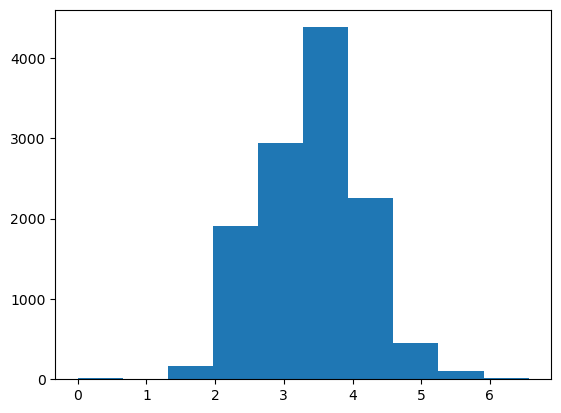

In [16]:
plt.hist(df['Budget'])
plt.show()

<Axes: >

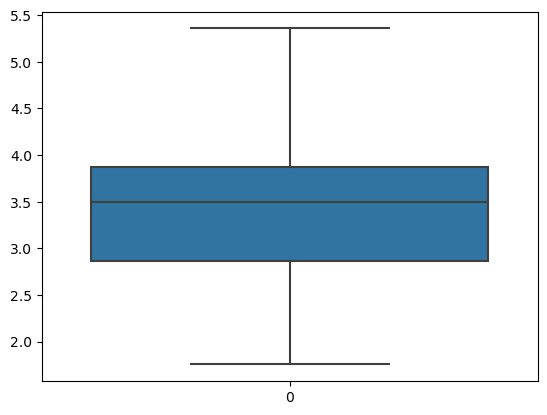

In [17]:
# Calculate the IQR, lower, and upper bounds

Q1 = df['Budget'].quantile(0.25)
Q3 = df['Budget'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers = df[(df['Budget'] < lower_bound) | (df['Budget'] > upper_bound)]
df = df[(df['Budget'] >= lower_bound) & (df['Budget'] <= upper_bound)]

# Create the box plot
sns.boxplot(df['Budget'])

*The EDA phase revealed and addressed missing values in 'Duration' and 'Client Job Title.' Successful transformations, including Box-Cox on 'Budget,' mitigated skewness. Cleaned and visualized data now sets the stage for categorical data encoding in the Freelance Platform analysis.*

## Categorical Data Encoding

In [18]:
df.dtypes

Title                         object
Category Name                 object
Experience                    object
Sub Category Name             object
Currency                      object
Budget                       float64
Location                      object
Freelancer Preferred From     object
Type                          object
Description                   object
Duration                      object
Client City                   object
Client Country                object
Client Currency               object
Client Job Title              object
dtype: object

In [19]:
# Label Encoding (Label encoding is used to represent categorical data as ordinal integers)

from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df, columns):
    for col in columns:
        encoder = LabelEncoder()
        encoding = encoder.fit_transform(df[col])
        df[col] = encoding
        var = df[col].head()
        print(var)

# List of columns to label encode
columns_to_encode = ['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
                     'Location', 'Freelancer Preferred From', 'Type', 'Description', 'Duration',
                     'Client City', 'Client Country', 'Client Currency', 'Client Job Title']

# Call the function to label encode the specified columns
label_encode_columns(df, columns_to_encode)

0     956
1    6335
2    1094
3     461
5    1800
Name: Title, dtype: int32
0    1
1    7
2    0
3    0
5    6
Name: Category Name, dtype: int32
0    0
1    0
2    0
3    0
5    1
Name: Experience, dtype: int32
0    42
1    45
2    37
3    90
5    26
Name: Sub Category Name, dtype: int32
0    0
1    1
2    1
3    1
5    0
Name: Currency, dtype: int32
0    1
1    1
2    1
3    1
5    1
Name: Location, dtype: int32
0    1
1    1
2    1
3    1
5    1
Name: Freelancer Preferred From, dtype: int32
0    0
1    0
2    0
3    0
5    0
Name: Type, dtype: int32
0    10364
1     1236
2     2161
3     2163
5      564
Name: Description, dtype: int32
0    21
1    21
2    21
3    21
5    21
Name: Duration, dtype: int32
0    489
1    936
2    936
3    936
5    488
Name: Client City, dtype: int32
0     61
1    129
2    129
3    129
5    128
Name: Client Country, dtype: int32
0    0
1    1
2    1
3    1
5    0
Name: Client Currency, dtype: int32
0    1177
1    1127
2    1194
3    1194
5     149
Name: Cl

In [20]:
# we are using SS because it is suitable for a wide range of data and models

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Budget'] = scaler.fit_transform(df[['Budget']]) # fit - calculating mean and sd of data & transform - value after scaling 
df['Budget'][:5]

0   -0.123392
1   -1.141924
2   -1.639954
3   -1.488617
5    1.571911
Name: Budget, dtype: float64

In [21]:
df['Budget'].mean() # Calculate the mean value of the 'result' data

8.809324647310018e-16

In [22]:
import numpy as np
median_value = np.median(df['Budget']) # Calculate the median value of the 'result' data using numpy
median_value

0.12815933375328264

In [23]:
from scipy import stats
mode_value = stats.mode(df['Budget']) # Calculate the mode value of the 'result' data using scipy's mode function
mode_value

C:\Users\Sapna\AppData\Local\Temp\ipykernel_21676\2282642316.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(df['Budget']) # Calculate the mode value of the 'result' data using scipy's mode function


ModeResult(mode=array([0.31861116]), count=array([743]))

In [24]:
df['Budget'].std() # Calculate the standard deviation of the 'result' data

1.0000412056781718

In [25]:
df['Budget'].min() # Find the minimum value in the 'Budget' column of the DataFrame 'df'

-2.322457346222455

In [26]:
df['Budget'].max() # Find the maximum value in the 'Budget' column of the DataFrame 'df'

2.7526630506423064

# 2) Cluster

Use machine learning to create clusters of similar projects.

In [27]:
x = df.iloc[:, [0,1,2,3,4]]
x.head()

,Title,Category Name,Experience,Sub Category Name,Currency
0,956,1,0,42,0
1,6335,7,0,45,1
2,1094,0,0,37,1
3,461,0,0,90,1
5,1800,6,1,26,0


In [28]:
from sklearn.cluster import KMeans

wcss_list = []
# Loop through a range of cluster numbers from 1 to 10
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(x)
    wcss = model.inertia_ # Calculate the WCSS for the current number of clusters
    wcss_list.append(wcss) # Append the WCSS value to the list
     
wcss_list # Display the list of WCSS values for different cluster numbers

C:\Users\Sapna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sapna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sapna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sapna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[133590593098.89883,
 33673749945.201637,
 14791009912.387062,
 8402181170.971884,
 5352893478.058541,
 3753074008.9142294,
 2727246908.3242903,
 2105682609.3717194,
 1656576858.0774162,
 1361923227.0093756]

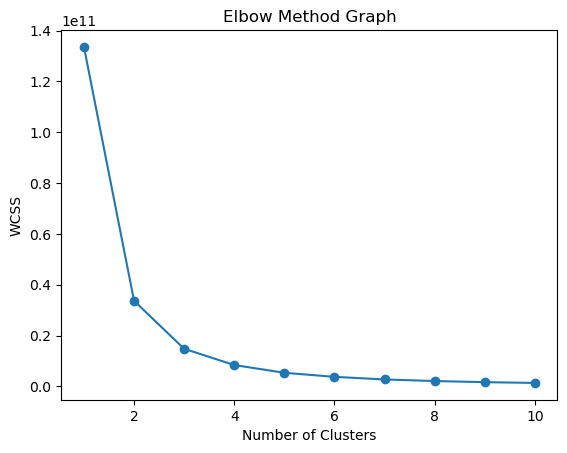

In [29]:
import matplotlib.pyplot as plt 

plt.plot(range(1,11), wcss_list,'-o') # Create a line plot of the WCSS values for different numbers of clusters
plt.title('Elbow Method Graph') # Set the title of the plot
plt.xlabel('Number of Clusters') # Set the label for the x-axis
plt.ylabel('WCSS') # Set the label for the y-axis
plt.show() # Display the plot

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x) # no 'y' because it's unsupervised
pred = kmeans.predict(x)
pred[:3]

C:\Users\Sapna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 2, 1])

In [31]:
kmeans.cluster_centers_

array([[9.60625118e+03, 4.03734130e+00, 6.55215335e-01, 6.26300722e+01,
        1.17176998e+00],
       [1.93272638e+03, 3.61090550e+00, 7.01702443e-01, 5.25756230e+01,
        1.17542561e+00],
       [5.79369200e+03, 3.47601476e+00, 6.94464945e-01, 5.51355474e+01,
        1.20713407e+00]])

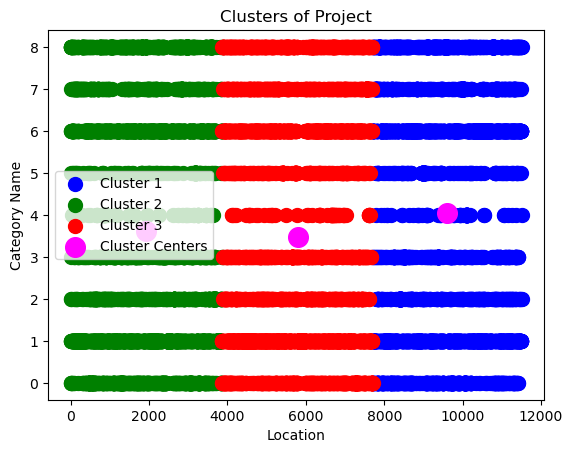

In [32]:
# Create scatter plots for each cluster and cluster centers

plt.scatter(x.iloc[pred==0, 0], x.iloc[pred==0, 1],
           s=100, c='blue', label='Cluster 1')
plt.scatter(x.iloc[pred==1, 0], x.iloc[pred==1, 1],
           s=100, c='green', label='Cluster 2')
plt.scatter(x.iloc[pred==2, 0], x.iloc[pred==2, 1],
           s=100, c='red', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:, 1],
           s=200, c='magenta', label='Cluster Centers')
plt.title('Clusters of Project') # Set the title of the plot
plt.xlabel('Location') # Set the label for the x-axis
plt.ylabel('Category Name') # Set the label for the y-axis
plt.legend() # Add a legend to the plot to distinguish data points and cluster centers
plt.show() # Display the plot

# 3) Regression

Create a regression model to predict the 'budget'.

In [33]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Description,Duration,Client City,Client Country,Client Currency,Client Job Title
0,956,1,0,42,0,-0.123392,1,1,0,10364,21,489,61,0,1177
1,6335,7,0,45,1,-1.141924,1,1,0,1236,21,936,129,1,1127
2,1094,0,0,37,1,-1.639954,1,1,0,2161,21,936,129,1,1194
3,461,0,0,90,1,-1.488617,1,1,0,2163,21,936,129,1,1194
5,1800,6,1,26,0,1.571911,1,1,0,564,21,488,128,0,149


In [34]:
# split the data into x and y

x = df.drop(columns=['Budget'])
y = df['Budget']

In [35]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest=train_test_split(x,y,
                                              train_size=0.7,
                                             random_state=1)

### XGBoost Regression

In [36]:
!pip install xgboost

In [37]:
import xgboost as xgb

model = xgb.XGBRegressor() # Create an instance of the XGBRegressor model
model.fit(xtrain, ytrain) # Fit the model to the training data
trainpred = model.predict(xtrain) # Make predictions on the training data
trainpred[:5] # Display the first 5 predictions

array([ 1.3640537 ,  1.3072898 , -1.5222318 ,  0.99022496, -0.66387075],
      dtype=float32)

In [38]:
testpred = model.predict(xtest) # Make predictions on the test data using the trained model
testpred # Display the test predictions

array([-0.7291285 ,  0.70003724, -1.0932764 , ..., -0.944017  ,
       -0.6009989 , -1.0011668 ], dtype=float32)

In [39]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ytrain, trainpred) # Calculate the mean squared error for training data

0.13185775409381667

In [40]:
mean_squared_error(ytest, testpred) # Calculate the mean squared error for test data

0.3316048886167132

In [41]:
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error (MAE) for the training predictions and true training labels
mae_train = mean_absolute_error(ytrain,trainpred)
mae_train

0.25981870039243443

In [42]:
# Calculate the mean absolute error (MAE) for the testing predictions and true testing labels
mae_test = mean_absolute_error(ytest,testpred)
mae_test

0.42899353652810474

*The regression model, powered by XGBoost, is doing wonders! It's nailing the budget predictions with an impressive precision – the Mean Squared Error (MSE) is a low 0.332 on the test set. And the Mean Absolute Error (MAE) of 0.429? It's like saying it's almost always spot-on with the budget calls.*

# 4) Classification

Create a classification model to predict the value of the 'Type' column.

In [43]:
# split the data into x and y

x = df.drop(columns=['Type'])
y = df['Type']

In [44]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                                               train_size=0.7,
                                               random_state=1)

### Random Forest Classification

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100) # Create a Random Forest Classifier model with 100 trees (n_estimators)
model.fit(xtrain, ytrain) # Fit the model to the training data
trainpred = model.predict(xtrain) # Make predictions on the training data
trainpred[:5]  # Display the first 5 predictions

array([0, 0, 1, 0, 1])

In [46]:
model.predict_proba(xtrain)[:5] # Predict probabilities for training data

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.11, 0.89],
       [1.  , 0.  ],
       [0.08, 0.92]])

In [47]:
from sklearn.metrics import classification_report 

# Generate a classification report to evaluate the model's performance on the training data
print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7241
           1       1.00      1.00      1.00      1253

    accuracy                           1.00      8494
   macro avg       1.00      1.00      1.00      8494
weighted avg       1.00      1.00      1.00      8494



In [48]:
# Generate a classification report to evaluate the model's performance on the test data
testpred = model.predict(xtest)         
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3109
           1       0.87      0.74      0.80       532

    accuracy                           0.95      3641
   macro avg       0.91      0.86      0.89      3641
weighted avg       0.94      0.95      0.94      3641



*The classification model, especially the Random Forest one, is rocking it! It's hitting a solid 95% accuracy on new stuff it hasn't seen before. The precision and recall for one type of project (they call it Class 0) are top-notch, like hitting 100% in a test you didn't even study for! For the other type (Class 1), it's doing great but stumbled a bit, like getting a high grade but with a tiny hiccup.*